[NBViwer](https://nbviewer.org/github/MatheusMorandi/Cnpj_Academias/blob/main/src/eda_cnae_prin.ipynb)

[Apresentação](https://docs.google.com/presentation/d/11s1ptFhg7Pkh6uphaX8I7dUzIKSeMkYNh72awzzp814/edit?usp=sharing)

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt 

import seaborn as sns

import plotly.express as px

import warnings 

warnings.filterwarnings('ignore')

In [2]:
schema = {
    "CNPJ BÁSICO": np.str_,
    "CNPJ ORDEM": np.str_,
    "CNPJ DV": np.str_,
    "IDENTIFICADOR MATRIZ/FILIAL": np.str_,
    "NOME FANTASIA": np.str_,
    "SITUAÇÃO CADASTRAL": np.str_,
    "DATA SITUAÇÃO CADASTRAL": np.str_, 
    "MOTIVO SITUAÇÃO CADASTRAL": np.str_,
    "DATA DE INÍCIO ATIVIDADE": np.str_, 
    "CNAE FISCAL PRINCIPAL": np.str_,
    "CNAE FISCAL SECUNDÁRIA": np.str_,
    "TIPO DE LOGRADOURO": np.str_,
    "LOGRADOURO": np.str_,
    "NÚMERO": np.str_,
    "BAIRRO": np.str_,
    "CEP": np.str_,
    "UF": np.str_,
    "MUNICÍPIO": np.str_,
    "DDD 1": np.str_,
    "TELEFONE 1": np.str_,
    "CORREIO ELETRÔNICO": np.str_,
    "REGIAO": np.str_
}

In [9]:
dados = pd.read_csv("../data/processed/academias_final_nv.csv", sep = ";", dtype = schema)

dados.head()

,CNPJ BÁSICO,CNPJ ORDEM,CNPJ DV,IDENTIFICADOR MATRIZ/FILIAL,NOME FANTASIA,SITUAÇÃO CADASTRAL,DATA SITUAÇÃO CADASTRAL,MOTIVO SITUAÇÃO CADASTRAL,DATA DE INÍCIO ATIVIDADE,CNAE FISCAL PRINCIPAL,...,LOGRADOURO,NÚMERO,BAIRRO,CEP,UF,MUNICÍPIO,DDD 1,TELEFONE 1,CORREIO ELETRÔNICO,REGIAO
0,34185978,0001,97,1,UP CENTRO FISICO,02,20190711,00,20190711,9313100,...,ENGENHO VELHO QUADRA 13,SN,SETOR HABITACIONAL FERCAL (SOBRADINHO),73150045,DF,BRASILIA,61,92639029,CONTATO.UPACADEMIAFERCAL@GMAIL.COM,Centro-Oeste
1,34200040,0001,07,1,IRON MUSCLE,02,20190712,00,20190712,9313100,...,ALEGRETE,505,MARINSKY,95585000,RS,ARROIO DO SAL,51,91800665,VIVANFIT@GMAIL.COM,Sul
2,34201548,0001,11,1,ASMF,02,20190712,00,20190712,9313100,...,DO MANGUEIRA,S/N,ILHA DE SANTA RITA,57160000,AL,MARECHAL DEODORO,82,32606021,maatiasaraujo@hotmail.com,Nordeste
3,34213183,0001,45,1,NaN,02,20190715,00,20190715,9313100,...,DO TABOAO,2690,TABOAO,09655000,SP,SAO BERNARDO DO CAMPO,11,40446667,CONTATO@CONTABILIDADEMB.COM.BR,Sudeste
4,34214045,0001,80,1,CROSSCIRCUIT,02,20240614,00,20190715,9313100,...,SAO JOSE,600,VILA PRAIANA,42704000,BA,LAURO DE FREITAS,71,92099491,PEDROPINHEIRO1957@GMAIL.COM,Nordeste


In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70427 entries, 0 to 70426
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CNPJ BÁSICO                  70427 non-null  object
 1   CNPJ ORDEM                   70427 non-null  object
 2   CNPJ DV                      70427 non-null  object
 3   IDENTIFICADOR MATRIZ/FILIAL  70427 non-null  object
 4   NOME FANTASIA                56018 non-null  object
 5   SITUAÇÃO CADASTRAL           70427 non-null  object
 6   DATA SITUAÇÃO CADASTRAL      70427 non-null  object
 7   MOTIVO SITUAÇÃO CADASTRAL    70427 non-null  object
 8   DATA DE INÍCIO ATIVIDADE     70427 non-null  object
 9   CNAE FISCAL PRINCIPAL        70427 non-null  object
 10  CNAE FISCAL SECUNDÁRIA       42124 non-null  object
 11  TIPO DE LOGRADOURO           70377 non-null  object
 12  LOGRADOURO                   70427 non-null  object
 13  NÚMERO                       70427 n

In [11]:
dados.columns

Index(['CNPJ BÁSICO', 'CNPJ ORDEM', 'CNPJ DV', 'IDENTIFICADOR MATRIZ/FILIAL',
       'NOME FANTASIA', 'SITUAÇÃO CADASTRAL', 'DATA SITUAÇÃO CADASTRAL',
       'MOTIVO SITUAÇÃO CADASTRAL', 'DATA DE INÍCIO ATIVIDADE',
       'CNAE FISCAL PRINCIPAL', 'CNAE FISCAL SECUNDÁRIA', 'TIPO DE LOGRADOURO',
       'LOGRADOURO', 'NÚMERO', 'BAIRRO', 'CEP', 'UF', 'MUNICÍPIO', 'DDD 1',
       'TELEFONE 1', 'CORREIO ELETRÔNICO', 'REGIAO'],
      dtype='object')

In [12]:
dados["CNPJ COMPLETO"] = dados["CNPJ BÁSICO"] + dados["CNPJ ORDEM"] + dados["CNPJ DV"]

In [13]:
dados["DATA SITUAÇÃO CADASTRAL"] = pd.to_datetime(dados["DATA SITUAÇÃO CADASTRAL"], format = "%Y%m%d", errors = "coerce")

dados["DATA SITUAÇÃO CADASTRAL"] = dados["DATA SITUAÇÃO CADASTRAL"].dt.strftime("%d/%m/%Y")

dados["DATA DE INÍCIO ATIVIDADE"] = pd.to_datetime(dados["DATA DE INÍCIO ATIVIDADE"], format = "%Y%m%d", errors = "coerce")

In [14]:
dados["ANO INICIO"] = dados["DATA DE INÍCIO ATIVIDADE"].dt.year

dados["MES INICIO"] = dados["DATA DE INÍCIO ATIVIDADE"].dt.month_name()

aberturas_por_ano = dados.groupby("ANO INICIO").size().reset_index(name="TOTAL ABERTURAS")

aberturas_por_mes_ano = dados.groupby(["ANO INICIO", "MES INICIO"]).size().reset_index(name="TOTAL ABERTURAS")

In [15]:
aberturas_por_ano, aberturas_por_mes_ano

(    ANO INICIO  TOTAL ABERTURAS
 0         1949                1
 1         1967                1
 2         1968                1
 3         1969                2
 4         1970                1
 5         1971                1
 6         1972                2
 7         1973                1
 8         1974                2
 9         1975                2
 10        1976                2
 11        1977                5
 12        1978                5
 13        1979                8
 14        1980               11
 15        1981               14
 16        1982               21
 17        1983               26
 18        1984               30
 19        1985               34
 20        1986               66
 21        1987               49
 22        1988               36
 23        1989               54
 24        1990               67
 25        1991               52
 26        1992               86
 27        1993              103
 28        1994              110
 29       

In [16]:
dados["DATA DE INÍCIO ATIVIDADE"] = dados["DATA DE INÍCIO ATIVIDADE"].dt.strftime("%d/%m/%Y")

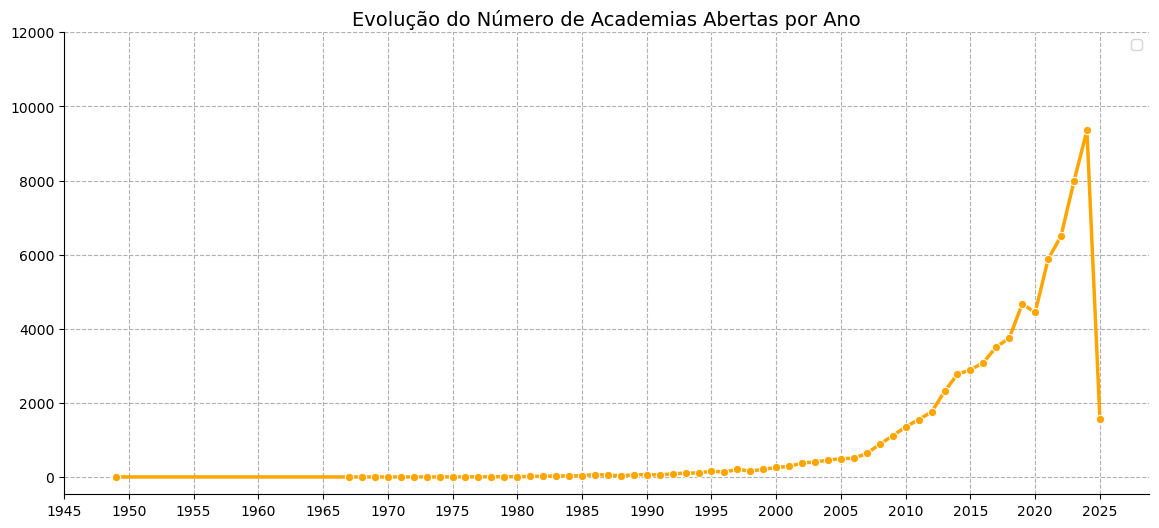

In [17]:
plt.figure(figsize=(14,6))

sns.lineplot(data = aberturas_por_ano,
            x = "ANO INICIO",
            y = "TOTAL ABERTURAS",
            marker='o',
            color = "orange",
            legend = False,
            linewidth = 2.5)

plt.title("Evolução do Número de Academias Abertas por Ano", fontsize = 14, pad = 5)

plt.legend()

plt.ylabel("")

plt.xlabel("")

plt.yticks(range(0, 13000, 2000))

plt.xticks(range(1945, 2026, 5))

plt.grid(True, linestyle = "--")

sns.despine()

plt.show()

In [22]:
dados_decada = aberturas_por_mes_ano[aberturas_por_mes_ano["ANO INICIO"] >= 2010]

dados_decada

,ANO INICIO,MES INICIO,TOTAL ABERTURAS
375,2010,April,105
376,2010,August,115
377,2010,December,95
378,2010,February,105
379,2010,January,86
...,...,...,...
552,2024,November,651
553,2024,October,833
554,2024,September,813
555,2025,February,312


In [44]:
nomes = dados["NOME FANTASIA"]

nomes = nomes.dropna().reset_index(drop = True)
nomes.info()

#nomes.to_csv("nomes_fantasia.csv", sep = ";", index = False)

<class 'pandas.core.series.Series'>
RangeIndex: 56018 entries, 0 to 56017
Series name: NOME FANTASIA
Non-Null Count  Dtype 
--------------  ----- 
56018 non-null  object
dtypes: object(1)
memory usage: 437.8+ KB


In [23]:
dados_decada = dados_decada[dados_decada["ANO INICIO"] < 2025]

dados_decada

,ANO INICIO,MES INICIO,TOTAL ABERTURAS
375,2010,April,105
376,2010,August,115
377,2010,December,95
378,2010,February,105
379,2010,January,86
...,...,...,...
550,2024,March,791
551,2024,May,749
552,2024,November,651
553,2024,October,833


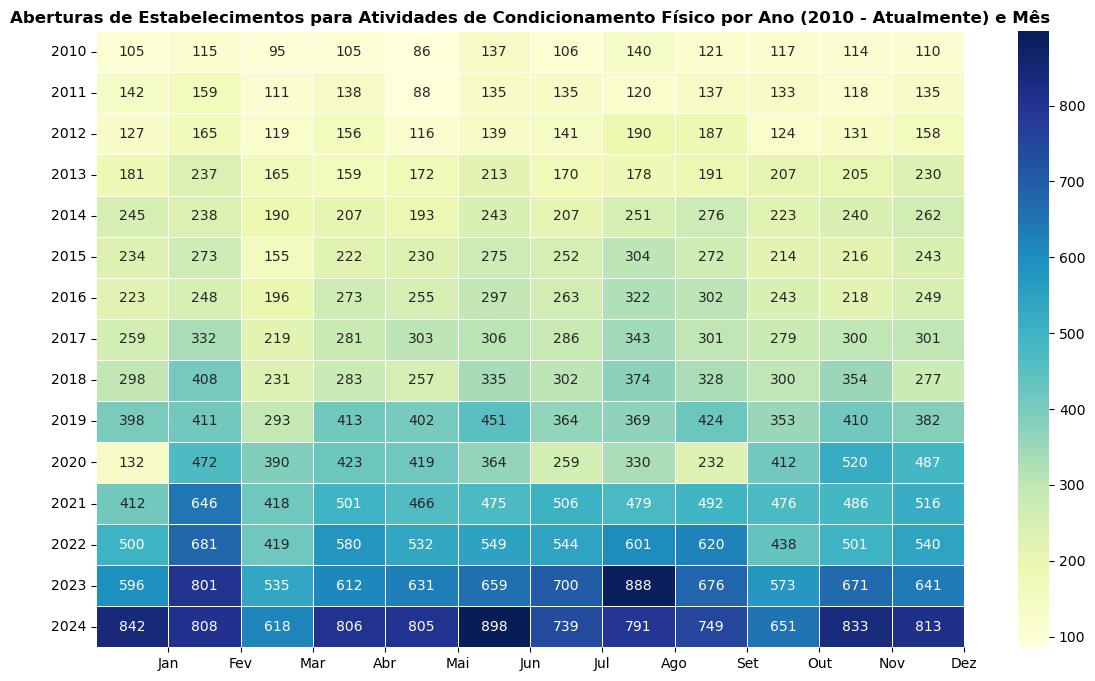

In [24]:
heatmap_data = dados_decada.pivot_table(
    index = "ANO INICIO",
    columns = "MES INICIO",
    values = "TOTAL ABERTURAS",
    fill_value = 0
)

plt.figure(figsize = (14, 8))
sns.heatmap(
    heatmap_data,
    cmap = "YlGnBu",
    annot = True,
    fmt = ".0f",    
    linewidths = 0.5
)

plt.title("Aberturas de Estabelecimentos para Atividades de Condicionamento Físico por Ano (2010 - Atualmente) e Mês", fontsize = 12, fontweight = "bold")

plt.xlabel("")

plt.ylabel("")

plt.xticks(ticks = range(1, 13), labels = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"])

plt.yticks(rotation = 0)

plt.show()

In [25]:
qntd_uf = dados["UF"].value_counts().reset_index()

qntd_uf = qntd_uf.drop(index = 27)

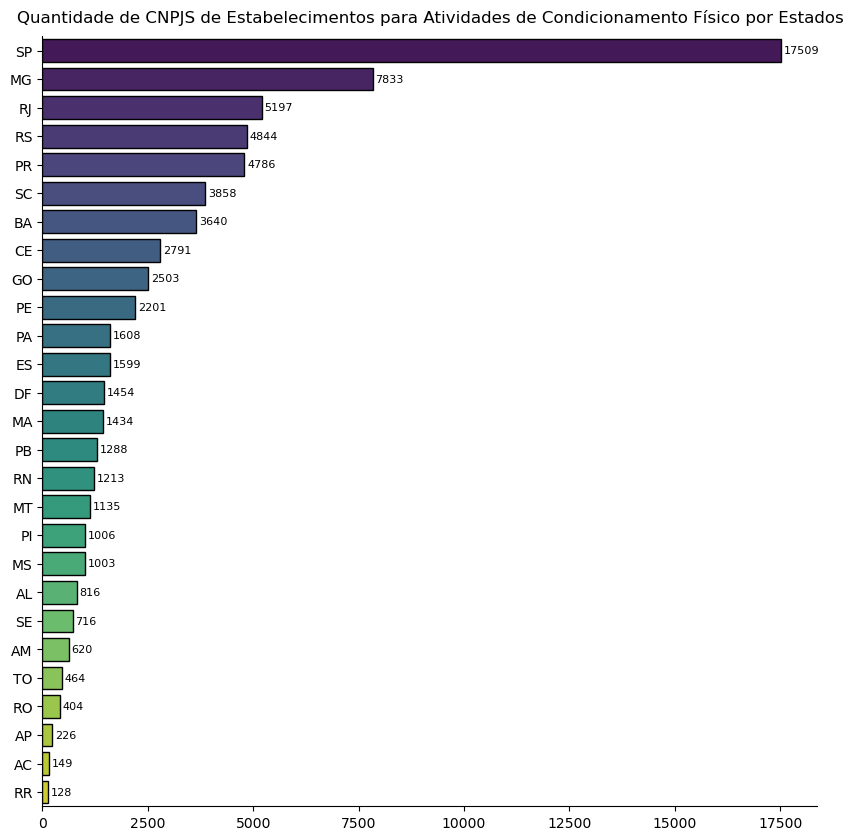

In [26]:
plt.figure(figsize = (10,10))

grafico_qntd = sns.barplot(data = qntd_uf, 
                            x = "count", 
                            y = "UF", 
                            hue = "UF", 
                            palette = "viridis", 
                            edgecolor = "Black", 
                            legend = False)

for container in grafico_qntd.containers:
    grafico_qntd.bar_label(container, padding = 2, fontsize = 8)

plt.title("Quantidade de CNPJS de Estabelecimentos para Atividades de Condicionamento Físico por Estados", fontsize = 12, pad = 10)

plt.xlabel("")

plt.ylabel("")

sns.despine()

plt.show()

In [27]:
top_cidades = dados["MUNICÍPIO"].value_counts().head(10)

top_cidades

MUNICÍPIO
SAO PAULO         5033
RIO DE JANEIRO    2317
BRASILIA          1454
CURITIBA          1156
BELO HORIZONTE    1147
FORTALEZA         1002
PORTO ALEGRE       970
SALVADOR           807
GOIANIA            719
CAMPINAS           622
Name: count, dtype: int64

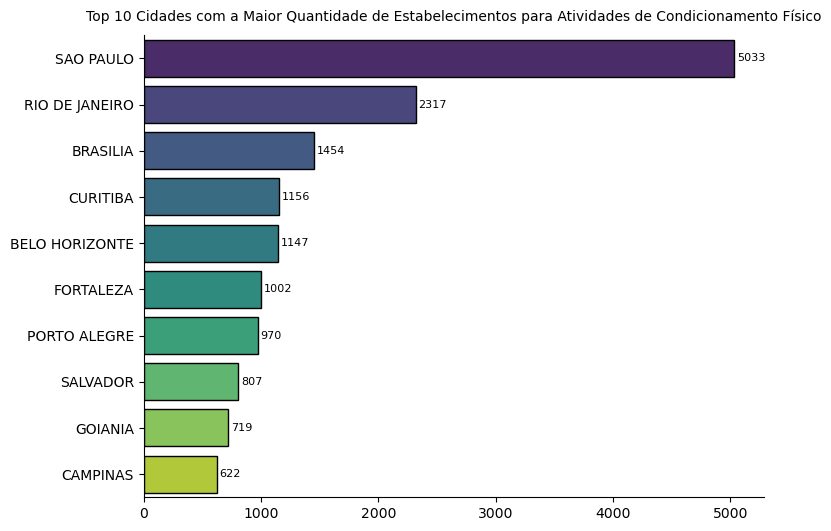

In [28]:
plt.figure(figsize = (8, 6))

grafico_qntd = sns.barplot(data = pd.DataFrame(top_cidades), 
                            x = top_cidades.values, 
                            y = top_cidades.index, 
                            hue = top_cidades.index, 
                            palette = "viridis", 
                            edgecolor = "Black", 
                            legend = False)

for container in grafico_qntd.containers:
    grafico_qntd.bar_label(container, padding = 2, fontsize = 8)

plt.title("Top 10 Cidades com a Maior Quantidade de Estabelecimentos para Atividades de Condicionamento Físico", fontsize = 10, pad = 10)

plt.xlabel("")

plt.ylabel("")

sns.despine()

plt.show()